

# Investigating Firearm Background Checks using FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Initial Data Exploration</a></li>
<li><a href="#eda">Exploratory Analysis & Data Wrangling</a></li>
     <ul>
         <li><a href="#rq1">Research Question 1</a></li>
         <li><a href="#rq2">Research Question 2</a></li>
         <li><a href="#rq3">Research Question 3</a></li>
         <li><a href="#rq4">Research Question 4</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
     <ul>
         <li><a href="#additional insights">Additional Insights</a></li>
     </ul>
<li><a href="#limitations">Limitations</a></li>    
<li><a href="#source index">Source Index</a></li>
</ul>

<a id='intro'></a>
# Introduction

The data explored in this project was retrieved from the [FBI's National Instant Criminal Background Check System](https://www.fbi.gov/services/cjis/nics) (NICS). Additional information about the NICS provided by the FBI's website is listed below: 

> *Mandated by the Brady Handgun Violence Prevention Act of 1993 and launched by the FBI on November 30, 1998, NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 230 million such checks have been made, leading to more than 1.3 million denials.*

Before continuing, there are several notes to highlight about interpreting this data.

**1. The number of firearm background checks does not equal the number of gun sales**
* In the PDF files for this dataset, the FBI provides an important disclaimer: 
>*These statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.*

**2. States can not be compared directly**
* In this project, trends between states are explored and visualizations are provided for findings. However, it is important to keep in mind that state laws for firearms differ across the country. The impact of state laws on firearm background checks is not reflected in this dataset. For this this reason, the insights can not be directly compared between states.

<a id='wrangling'></a>
# Initial Data Exploration

### FBI Gun Data

The dataset used to explore firearm background checks can be found from this [BuzzFeed News GitHub repository](https://github.com/BuzzFeedNews/nics-firearm-background-checks). 
> *The FBI provides data on the number of firearm checks by month, state, and type — but as a PDF. The code in this GitHub repository downloads that PDF, parses it, and produces a spreadsheet/CSV of the data. Click here to download the data, which currently covers November 1998 – May 2020.*

### U.S. Census Data
The U.S. census data can be found on the [census website](https://data.census.gov/cedsci/) and downloaded [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv). This dataset includes information about demographics, population estimates and additional variables at the state level. Most variables only have one data point per state (2016) with several states having data for more than one year.

### General Properties
Initial exploration of datasets

In [1]:
# Setting up workspace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats   # for pearson correlation
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Loading the datasets and performing operations to inspect data
# Reading csv format data
df_census = pd.read_csv('census_data.csv')

In [3]:
# Reading excel format data
df_gun = pd.read_excel('gun_data.xlsx')

In [4]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [6]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Median household income (in 2015 dollars), 201...",(c),6.40%,7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,0.084,0.048,50.40%,2.50%,"625,741","165,788,897",13.40%,1.50%,"54,157.80",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [8]:
# Exploring gun dataset:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [9]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [10]:
type(df_gun['month'][0])

str

The 'month' and 'state' columns are listed as objects but actually contain strings. This will be fixed in the next section (Exploratory Analysis & Data Wrangling)

In [11]:
df_gun.count()

month                        12485
state                        12485
permit                       12461
permit_recheck                1100
handgun                      12465
long_gun                     12466
other                         5500
multiple                     12485
admin                        12462
prepawn_handgun              10542
prepawn_long_gun             10540
prepawn_other                 5115
redemption_handgun           10545
redemption_long_gun          10544
redemption_other              5115
returned_handgun              2200
returned_long_gun             2145
returned_other                1815
rentals_handgun                990
rentals_long_gun               825
private_sale_handgun          2750
private_sale_long_gun         2750
private_sale_other            2750
return_to_seller_handgun      2475
return_to_seller_long_gun     2750
return_to_seller_other        2255
totals                       12485
dtype: int64

In [12]:
# Exploring census data
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [13]:
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [14]:
# randomly picking 'Texas' and '10' to check data point type
type(df_census['Texas'][10])

str

This dataset contains a lot of numeric-like data that are actually strings. The strings will be parsed into numerics later in this analysis (Exploratory Analysis & Data Wrangling section).

In [15]:
# Checking index of census data
index_census_state = df_census.iloc[0].index
index_census_state

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [16]:
# Looks like 'Fact' and 'Fact Note' should be excluded as they don't seme relevant 
index_census_state = index_census_state[2:]
index_census_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [17]:
# Should be 50 states
len(index_census_state)

50

In [18]:
index_gun_state = df_gun.groupby('state').sum().index
index_gun_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [19]:
# Should be 50 states
len(index_gun_state)

55

Number of states vary between datasets. Further exploration is needed to determine reasoning behind different indice lengths.

In [20]:
# looking at variation in indice length, finding missing states
for s in index_gun_state:
    if s not in index_census_state:
        print(s)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


These additional states explain the different indice lengths. They will need to be excluded later for consistent analyis. This will be fixed in the next section (Exploratory Analysis & Data Wrangling). 

**Note: In this section, areas for improvement are highlighted. The actual data cleaning is provided in the Exploratory Analysis & Data Wrangling section to show a complete exploratory process.**

<a id='eda'></a>
# Exploratory Analysis & Data Wrangling

<a id='rq1'></a>
## Research Question 1: What census data is most associated with high background checks?

**Step 1:** Preparing the FBI gun dataset for analysis. Monthly data for each state will be grouped and summed to provide a 'totals' column representing the total number of checks

In [21]:
gun_state = df_gun.groupby('state')

In [22]:
gun_state_sum = gun_state.sum()

In [23]:
# s_ stands for pd.Series
s_gun_state_totals = gun_state_sum['totals']

In [24]:
s_gun_state_totals.head()

state
Alabama        6706079
Alaska         1137643
Arizona        4425714
Arkansas       3752633
California    19014063
Name: totals, dtype: int64

**Step 2:** Preparing the census data by transposing it to match the NICS data

In [25]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [26]:
# Flipping dataframe
df_census_t = df_census.T

In [27]:
# Checking this change, dataframe should be flipped
df_census_t.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Displaying all census data variable names with numeric-like values. This will be used for later analysis when looking at correlation.
dict_census_vars = {}
for i in range(64):
    dict_census_vars[i] = df_census['Fact'][i]
    print(i, df_census['Fact'][i])

0 Population estimates, July 1, 2016,  (V2016)
1 Population estimates base, April 1, 2010,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 Persons under 5 years, percent, April 1, 2010
6 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 Persons under 18 years, percent, April 1, 2010
8 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 Persons 65 years and over, percent, April 1, 2010
10 Female persons, percent,  July 1, 2016,  (V2016)
11 Female persons, percent, April 1, 2010
12 White alone, percent, July 1, 2016,  (V2016)
13 Black or African American alone, percent, July 1, 2016,  (V2016)
14 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 Asian alone, percent, July 1, 2016,  (V2016)
16 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
17 Two or More Races, percent, 

**Step 3:** Pearson's correlation is calculated for all numerical variables in the census dataset to see which variables are most correlated with background checks

In [29]:
# Missing states identified in the Data Wrangling Process
for s in s_gun_state_totals.index:
    if s not in df_census_t.index:
        print(s)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [30]:
# Removing states 
s_gun_state_totals = s_gun_state_totals.drop([
    'District of Columbia',
    'Guam',
    'Mariana Islands',
    'Puerto Rico',
    'Virgin Islands'])

In [31]:
# Using a helper method to parse the string percentage data with '%'
def parse_str_percent(string_percent):
    return float(string_percent.strip('%'))/100

In [32]:
# Using Pearson's Correlation Coefficient
# Formula: correlation = average of (x in standard units) time (y in standard units)
# Pass the argument "ddof=0" to the pandas std()
def correlation(x, y):
    x_std = x.std(ddof=0)
    y_std = y.std(ddof=0)
    x_mean = x.mean()
    y_mean = y.mean()
    correlation = (((x - x_mean)/x_std) * ((y - y_mean)/y_std)).mean()
    return correlation

In [33]:
# Using get_correlation method to parse numeric-like strings into numerics and return correlation coefficients
def get_correlation(s_gun_state_totals, column_num):
    '''
    First parsing the numeric-like string data, then calculating the correlation ceofficient
    The column_num paramter will get the column names from df_census_t
    '''
    series_x = df_census_t[column_num][2:]
    # Printing(type(series_x[0]))
    for i in range(len(series_x)):
        series_x[i] = series_x[i].replace('$','')
        if (series_x[i][-1]=='%'):
            series_x[i]=parse_str_percent(series_x[i])
        elif(series_x[i][-1]!='%'):
            try:
                series_x[i]=int(series_x[i].replace(',',''))
            except ValueError:
                try:
                    series_x[i]=float(series_x[i].replace(',',''))
                except ValueError:
                    series_x[i]=np.nan
    series_x.fillna(series_x.mean(),inplace=True)
    return correlation(s_gun_state_totals, series_x)

In [34]:
# Calculating correlation coefficients for each state's 'totals' gun data for all numerical varibales in census data
# Instantiating a correlation coefficients dict
corrcoefs = {}
# Iterating all numerical columns
for i in range(64): 
    corrcoef = get_correlation(s_gun_state_totals,i)
    corrcoefs[i] = corrcoef
    # Printing column index, correlation coefficient, and variable name
    print(i, round(corrcoef, 5), dict_census_vars[i])

0 0.6497 Population estimates, July 1, 2016,  (V2016)
1 0.64958 Population estimates base, April 1, 2010,  (V2016)
2 0.03633 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 0.64958 Population, Census, April 1, 2010
4 0.05601 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 0.06406 Persons under 5 years, percent, April 1, 2010
6 0.1098 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 0.13616 Persons under 18 years, percent, April 1, 2010
8 -0.16944 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 -0.1359 Persons 65 years and over, percent, April 1, 2010
10 0.16916 Female persons, percent,  July 1, 2016,  (V2016)
11 0.1531 Female persons, percent, April 1, 2010
12 0.01166 White alone, percent, July 1, 2016,  (V2016)
13 0.14433 Black or African American alone, percent, July 1, 2016,  (V2016)
14 -0.22843 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 -0.02228 Asian alone, percent, July 1, 201

In [35]:
# Sorting the dict of correlation coefficients by value in reverse order
sorted_corrcoefs = sorted(corrcoefs, key=corrcoefs.get, reverse=True)

In [36]:
# Printing sorted list
for each in sorted_corrcoefs:
    print(str(each) + ',', end='', flush=True)

42,20,30,22,23,60,0,1,3,59,44,51,43,50,54,55,56,61,41,57,52,29,40,58,49,53,46,18,33,21,10,31,11,36,13,7,6,37,63,5,4,2,32,12,15,28,62,26,24,9,19,16,25,17,35,8,27,48,47,14,38,45,39,34,

In [37]:
# Getting the first 10 and last 10 coefficients.
print(sorted_corrcoefs[:10])
print(sorted_corrcoefs[54:])

[42, 20, 30, 22, 23, 60, 0, 1, 3, 59]
[35, 8, 27, 48, 47, 14, 38, 45, 39, 34]


**The first 10 positive coefficients represent the top positive correlations. The last 10 negative coefficients represent the top negative correlations.**

In [38]:
# Moving all variable names into a dict
variables = {}
for i in range(64):
    variables[i]=df_census['Fact'][i]

In [39]:
# Printing top 10 positive and top 10 negative correlations
print('Top 10 positive correlations are:')
for each in sorted_corrcoefs[:10]:
    print('  ' + str(each) + ':' + str(round(corrcoefs[each], 5)) + ' ' + variables[each])
print('Top 10 negative correlations are:')   
for each in sorted_corrcoefs[54:][::-1]:
    print('  ' + str(each) + ':' + str(round(corrcoefs[each], 5)) + ' ' + variables[each])

Top 10 positive correlations are:
  42:0.67445 Total manufacturers shipments, 2012 ($1,000)
  20:0.67324 Veterans, 2011-2015
  30:0.65733 Households, 2011-2015
  22:0.65725 Housing units,  July 1, 2016,  (V2016)
  23:0.65546 Housing units, April 1, 2010
  60:0.65029 Veteran-owned firms, 2012
  0:0.6497 Population estimates, July 1, 2016,  (V2016)
  1:0.64958 Population estimates base, April 1, 2010,  (V2016)
  3:0.64958 Population, Census, April 1, 2010
  59:0.64661 Nonminority-owned firms, 2012
Top 10 negative correlations are:
  34:-0.47596 High school graduate or higher, percent of persons age 25 years+, 2011-2015
  39:-0.3246 In civilian labor force, female, percent of population age 16 years+, 2011-2015
  45:-0.29366 Total retail sales per capita, 2012
  38:-0.266 In civilian labor force, total, percent of population age 16 years+, 2011-2015
  14:-0.22843 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
  47:-0.21455 Median household income (in 2015 dollars

**The top negative correlations are far less significant than the top positive. The most significant correlations are:**
   * (42) 0.67445 Total Manufacturers Shipments
   * (20) 0.67324 Veterans
   * (30) 0.65733 Households

**While "Total Manufacturers Shipments" is the most correlated variable with number of gun background checks, it is important to note that correlation is not causation. While this variable has the most sifnicant correlation, this does not prove a cause and effect.**

**Step 4:** Making visualizations for the most significant correlation

In [40]:
# Concatenating the two series 
result = pd.concat([df_census_t[42], s_gun_state_totals], axis=1, ignore_index=False, sort=True)

In [41]:
# Checking concatenation, should see a single series that includes columns '42' and 'totals'
result.head()

,42,totals
Alabama,124809759,6706079.0
Alaska,1.1883e+08,1137643.0
Arizona,51243473,4425714.0
Arkansas,62712925,3752633.0
California,512303164,19014063.0


In [42]:
# Looking at column datatypes
result.columns = ['42', 'totals']
result.columns

Index(['42', 'totals'], dtype='object')

In [43]:
# Looking at non-null values by column
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   42      52 non-null     object 
 1   totals  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [44]:
#There are two more rows from '42' column than the 'totals' column. Exploring the reasoning behind this
result

,42,totals
Alabama,124809759,6706079.0
Alaska,1.1883e+08,1137643.0
Arizona,51243473,4425714.0
Arkansas,62712925,3752633.0
California,512303164,19014063.0
Colorado,50447098,6058482.0
Connecticut,55160095,3168126.0
Delaware,22597384,491369.0
Fact,"Total manufacturers shipments, 2012 ($1,000)",NaN
Fact Note,(c),NaN


**'Fact' and 'Fact Note' are inconsistent and non-relevant rows. These need to be dropped.**

In [45]:
# Dropping 'Fact' and 'Fact Note' columns 
result.drop(['Fact','Fact Note'],inplace=True)

In [46]:
# Checking, rows 'Fact' and 'Fact Note' should be gone
result

,42,totals
Alabama,124809759,6706079.0
Alaska,1.1883e+08,1137643.0
Arizona,51243473,4425714.0
Arkansas,62712925,3752633.0
California,512303164,19014063.0
Colorado,50447098,6058482.0
Connecticut,55160095,3168126.0
Delaware,22597384,491369.0
Florida,96924106,11695777.0
Georgia,155836792,7209942.0


In [47]:
# Checking, should have 50 rows for both columns
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   42      50 non-null     object 
 1   totals  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


**Column '42' needs to be converted into numerics.**

In [48]:
# Converting column '42' into numerics
result['42'] = pd.to_numeric(result['42'])

In [49]:
# Checking to confirm converstion to numerics, should se (float64) for column '42' datatype
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   42      50 non-null     float64
 1   totals  50 non-null     float64
dtypes: float64(2)
memory usage: 1.2+ KB


In [50]:
# Adding a workaround for warning message in next plot for cleaner display
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Text(0, 0.5, 'Total # of Background Checks')

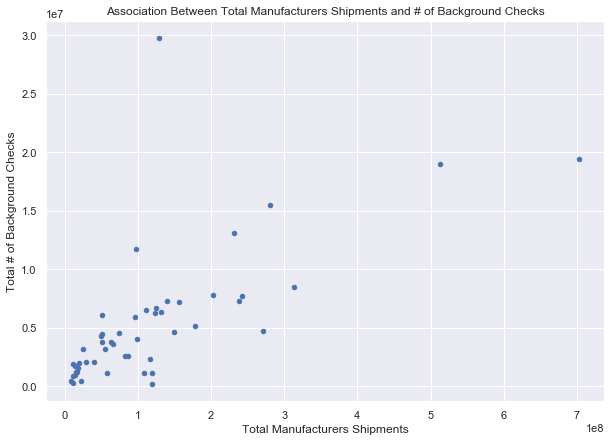

In [51]:
# Visualizing association bewtween number of manufacturer shipments and background checks 
sns.set(rc={'figure.figsize':(10,7)})
ax = result.plot.scatter(x='42', y='totals')
ax.set_title('Association Between Total Manufacturers Shipments and # of Background Checks')
ax.set_xlabel('Total Manufacturers Shipments')
ax.set_ylabel('Total # of Background Checks')

Text(0, 0.5, 'Total # of Background Checks')

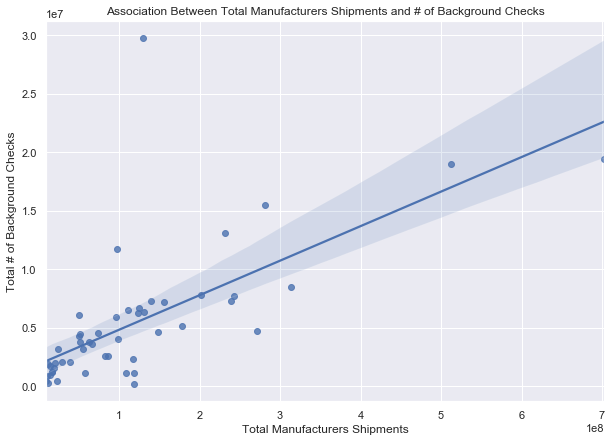

In [52]:
# Visualizing association bewtween number of manufacturer shipments and background checks with seaborn
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.regplot(result['42'], result['totals'])
ax.set_title('Association Between Total Manufacturers Shipments and # of Background Checks')
ax.set_xlabel('Total Manufacturers Shipments')
ax.set_ylabel('Total # of Background Checks')

In [53]:
# Displaying Pearson correlation coefficients (r,p)
print ('Association Between Total Manufacturers Shipments and # of Background Checks')
print (scipy.stats.pearsonr(result['totals'], result['42']))

Association Between Total Manufacturers Shipments and # of Background Checks
(0.6744495516528631, 7.870578074901762e-08)


**The Pearson correlation between manufacturers shipments and firearm background checks of about 0.674449 is indicative of a moderately positive relationship between the variables and the p<0.000000079 suggests that it is very unlikely to get this result by chance.**

**The visualizations reflect these statistics and indicate that an increase in manufacturer shipments results in a higher number of background checks for gun purchases with more frequent checks occurring at low manufacturer shipment totals.**

<a id='rq2'></a>
## Research Question 2:  Is seasonality associated with firearm shopping?

**Step 1:** Cleaning data by grouping the total number of background checks by state by month into a single dataframe and changing index format

In [54]:
# Grouping sum and all states' 'totals' column by 'month'
all_df_gun_totals = df_gun[['month','totals']]

In [55]:
# Seting index for 'month' column
all_df_gun_totals.set_index('month',inplace=True)

In [56]:
# Setting index format in 'month' column to include 'year - month' format
all_df_gun_totals=all_df_gun_totals[::-1]

In [57]:
# Grouping gun totals by month into a single data frame displaying month and totals
gun_totals_groupby_month = all_df_gun_totals.groupby('month').sum()

In [58]:
# Displaying this new dataframe
gun_totals_groupby_month.head()

,totals
month,
1998-11,21176
1998-12,870722
1999-01,585974
1999-02,690215
1999-03,741687


**Step 2:** Plotting visuals to analyze distribution of background checks 

Text(0.5, 0, '# Background Checks')

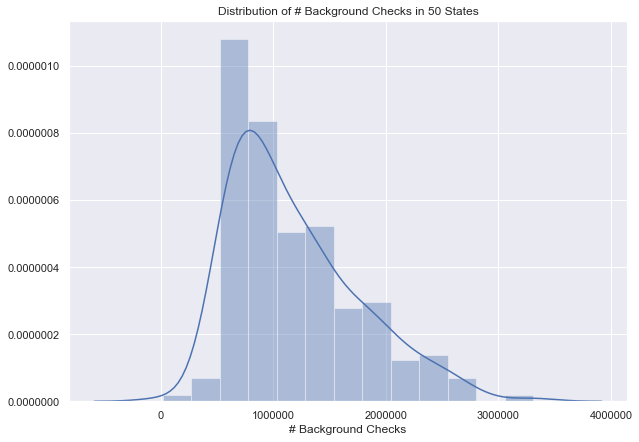

In [59]:
# Visualizing distribution of background checks for all states
ax = sns.distplot(gun_totals_groupby_month)
ax.set_title('Distribution of # Background Checks in 50 States')
ax.set_xlabel('# Background Checks')

**Distribution is left-skewed.**

Text(0.5, 0, '# Background Checks')

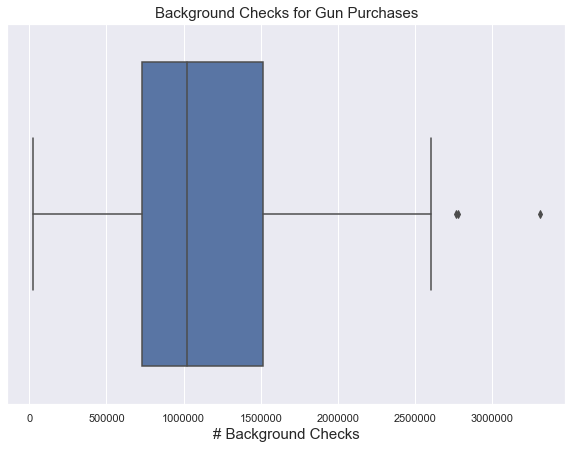

In [60]:
# Exploring the distribution of background checks via boxplot
ax = sns.boxplot(gun_totals_groupby_month)
ax.set_title('Background Checks for Gun Purchases', fontsize=15)
ax.set_xlabel('# Background Checks', fontsize=15)

**The box plot shows a few outliers.**

**Step 3:** Exploring trends through line plots

Text(0, 0.5, '# of Background Checks')

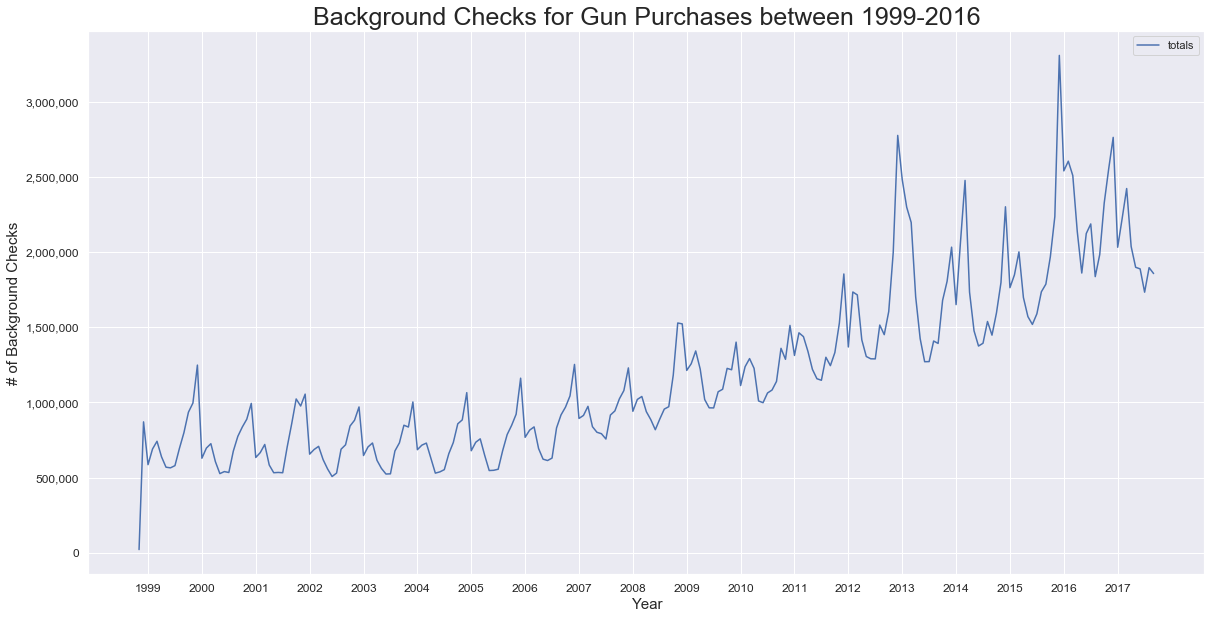

In [61]:
# Looking at the number of background checks betwen 1999-2016
tick_placement = pd.np.arange(2, len(gun_totals_groupby_month), 12)
ax = gun_totals_groupby_month.plot(figsize=(20,10))
ax.set_title('Background Checks for Gun Purchases between 1999-2016', fontsize=25)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12);
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels([gun_totals_groupby_month.index[i].split("-")[0] for i in tick_placement ])
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('# of Background Checks', fontsize=15)

**There seems to be an increaseing pattern here, but it is too broad to confirm a seasonal pattern. Building a line plot by year will provide a better visual to detect trends.**

[]

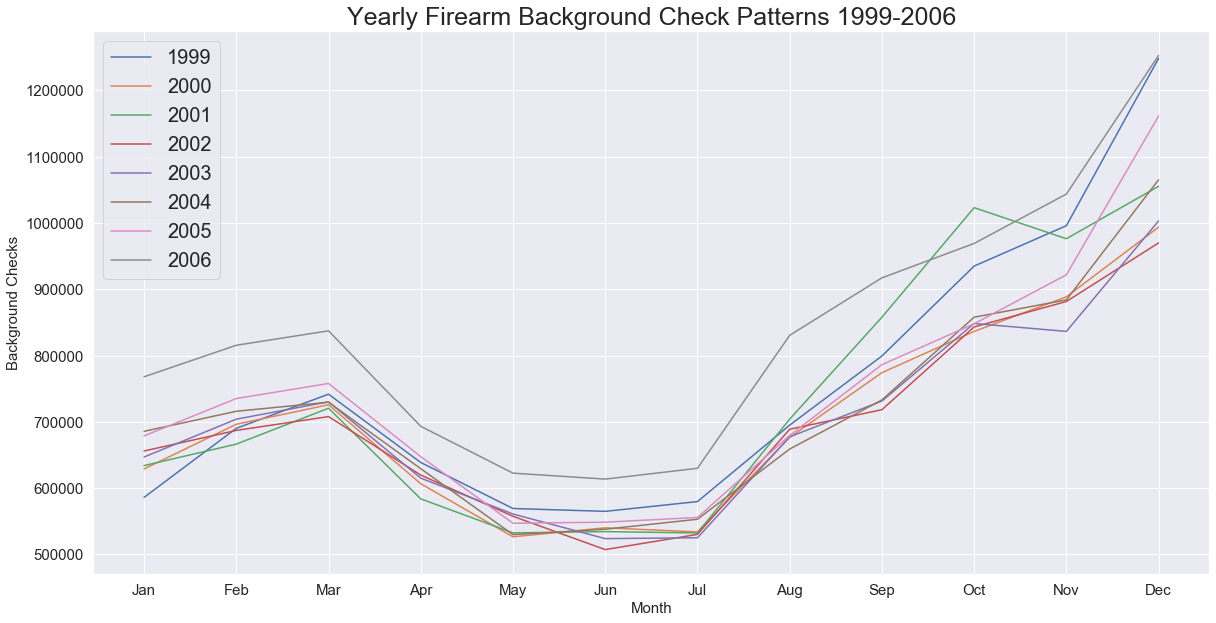

In [62]:
# Building a line plot by year for better visuals 
ax = gun_totals_groupby_month.loc['1999':'2000'].plot(figsize=(20,10),fontsize=15) #adding the year 1999's plot first
legend =['1999']
for i in range(2000,2007): #excluding 1998 and 2017, for they are not complete
    ax = gun_totals_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']), fontdict={
    'fontsize': 15,
    'fontweight': 15})
ax.set_title('Yearly Firearm Background Check Patterns 1999-2006', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Background Checks', fontsize=15)
ax.plot()

[]

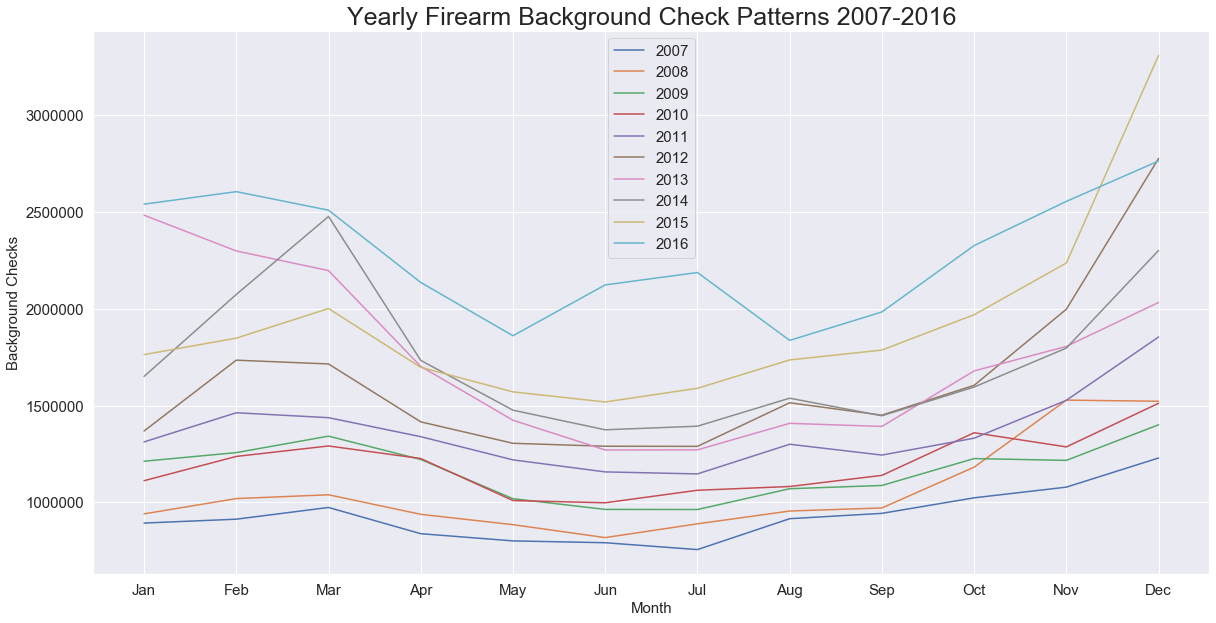

In [63]:
# Zooming in, looking at firearm background check trends from 2007-2016
ax = gun_totals_groupby_month.loc['2007':'2008'].plot(figsize=(20,10),fontsize=15) #adding the year 1999's plot first
legend =['2007']
for i in range(2008,2017): #excluding 1998 and 2017, for they are not complete
    ax = gun_totals_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=15)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']), fontdict={
    'fontsize': 15,
    'fontweight': 15})
ax.set_title('Yearly Firearm Background Check Patterns 2007-2016', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Background Checks', fontsize=15)
ax.plot()

**As seen in the yearly patterns from 1999 to 2016, there is a seasonal trend for firearm shopping with reduced background checks in the summer and increasing checks in the winter.**

**It is worth noting that unlike other years, firearm background checks peak in the summer of 2016. Additional research should be done to look into this change. Possible factors such as new regulations on gun control could provide a better understanding of increased background checks in the summer of 2016.**

<a id='rq3'></a>
## Research Question 3: What is the highest registered type of gun and its relationship to totals?

**Step 1:** Cleaning df_gun data to look at gun types by dropping duplicates, converting datatypes, and extracting month from datetime column

In [64]:
# Printing column labels in the dataframe 
for i, v in enumerate(df_gun.columns):
    print(i, v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


In [65]:
# Checking column with NaN
df_gun.isnull().any().any(), sum(df_gun.isnull().any())

(True, 23)

In [66]:
# Dropping duplicates, confirming changes
df_gun.drop_duplicates(inplace=True)
sum(df_gun.duplicated())

0

In [67]:
# Converting string into float, skipping first 2 columns (should be string, leaving unchanged) 
col1 = df_gun.iloc[:,np.r_[2:7, 8:26]].columns
for c in col1:
    c_mean = df_gun[c].mean()
    df_gun[c].fillna(c_mean, inplace = True)
    
# Confirming changes
df_gun.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [68]:
# Converting string into datatime format in df_gun
df_gun.month = pd.to_datetime(df_gun['month'], errors='coerce')

# Confirming changes
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [69]:
# Extracting month from datetime column
# Copying the dataframe and adding a new column with newly generated month
month_data = df_gun.month.dt.strftime("%B")
df_test = df_gun.copy()
df_test['registered_month'] = month_data

**Step 2:** Finding the highest registered gun type

In [70]:
# Finding highest registered type of gun
gun_type = {}
col_state = df_gun.columns[2:25]

for c in col_state:
    gun_type[c] = df_gun[c].sum()

max(gun_type, key=gun_type.get)

'long_gun'

**Long gun is the most registered gun type**

**Step 3:** Plotting visual to analyze the gun type with highest quantity and its relationship to totals

Text(0.5, 1, 'Long Gun Quantity in Relationship to Totals')

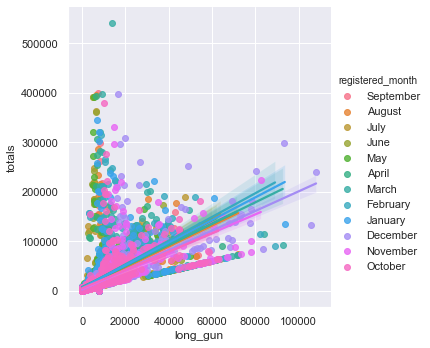

In [71]:
# Plotting with seaborn to visualize frequency of long gun registration among other gun types
sns.lmplot(x = 'long_gun', y = 'totals', hue = 'registered_month', data = df_test)
ax.set_title('Long Gun Quantity in Relationship to Totals')

**Long guns are the most registered gun type and are positively correlated with total background checks. In this figure, the estimated linear regression is shown as the blue line and estimates vary in the light blue shade with a 95% confidence interval.**

<a id='rq4'></a>
## Research Question 4: Which state has had the greatest number of firearm background checks since 1998?

**Step 1:** Grouping states and summing total checks per state since 1998

In [72]:
# Total checks by state per month
checks_by_state = df_gun.groupby(['state', 'month'])['totals'].sum().reset_index()

In [73]:
# Grouping states and sum of totals
state_totals = checks_by_state.groupby('state')['totals'].sum()

In [74]:
display(state_totals)

state
Alabama                  6706079
Alaska                   1137643
Arizona                  4425714
Arkansas                 3752633
California              19014063
Colorado                 6058482
Connecticut              3168126
Delaware                  491369
District of Columbia        5601
Florida                 11695777
Georgia                  7209942
Guam                       14997
Hawaii                    197580
Idaho                    1968134
Illinois                15471534
Indiana                  7737172
Iowa                     2297156
Kansas                   2624669
Kentucky                29762434
Louisiana                4705057
Maine                    1257457
Mariana Islands              462
Maryland                 2035652
Massachusetts            2571321
Michigan                 7254279
Minnesota                6279271
Mississippi              3576312
Missouri                 6549018
Montana                  1884124
Nebraska                 1136209
Neva

**Step 2:** Plotting total checks per state since 1998

Text(0, 0.5, '# of Background Checks')

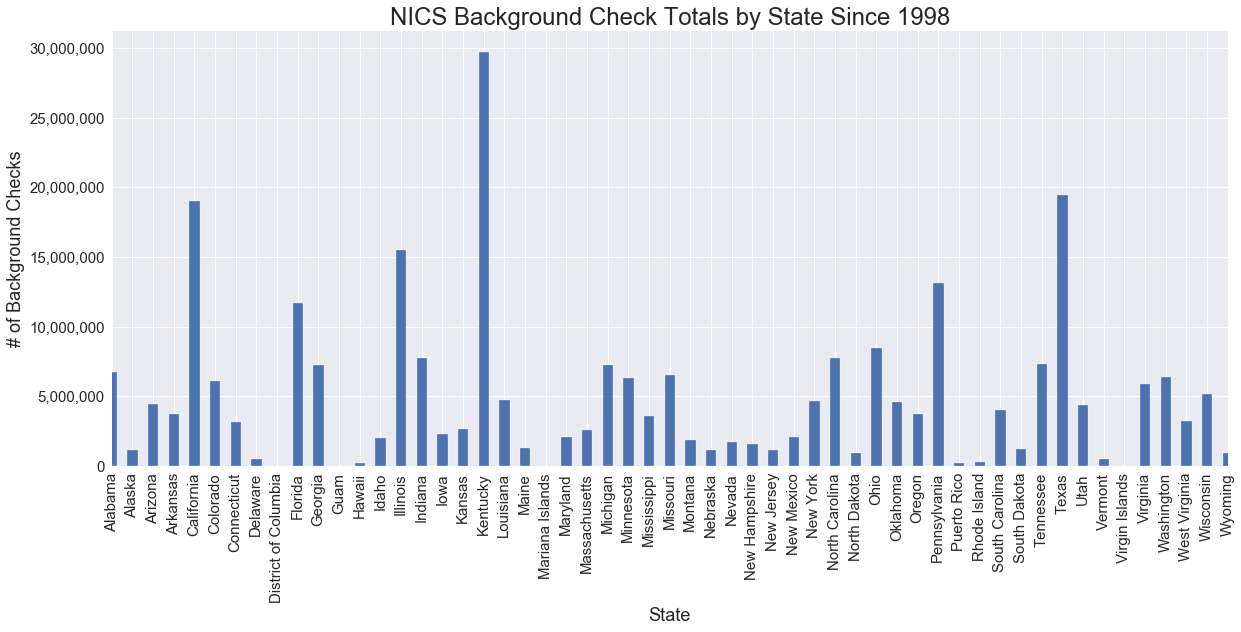

In [75]:
# Plotting with seaborn to look at background check totals by state since 1998
state_total_tick_placement = pd.np.arange(len(state_totals))
plt.style.use('seaborn')
state_ax = state_totals.plot(kind='bar',figsize=(20,8))

state_ax.set_title("NICS Background Check Totals by State Since 1998", fontsize=24)
state_ax.set_yticklabels([ "{0:,.0f}".format(y) for y in state_ax.get_yticks() ], fontsize=15);
plt.setp(state_ax.get_xticklabels(), fontsize=15)
state_ax.set_xticks(state_total_tick_placement)
state_ax.set_xticklabels(state_totals.index)
state_ax.set_xlim(0, len(state_totals) - 1)
state_ax.set_xlabel("")

state_ax.set_xlabel('State', fontsize=18)
state_ax.set_ylabel('# of Background Checks', fontsize=18)

**Kentucky has had the most activity in firearm background checks for guns since 1998 with 29,762,434 checks. Second to Kentucky is Texas (19,435,186 checks) and third is California (19,014,063 checks).**

<a id='conclusions'></a>
# Conclusions
Through the exploration of the U.S. Census and FBI Gun Datasets, the following insights were revealed:
>1. The census data most associated with high background checks is 'Total Manufacturers' Shipment.'
2. Firearm shopping has seasonality with background checks increasing in the winter and decreasing in the summer.
3. The most frequently registered gun type is a long gun and is positively correlated with the total number of firearm checks.
4. Kentucky has had the greatest number of firearm background checks since 1998.

<a id='additional insights'></a>
## Additional Insights

**A one-to-one comparison can not be made between firearm background checks and gun sales.**

As noted in the introduction of this analysis, the FBI claims the number of firearm background checks does not equal number of sales. While the dataset is limited to providing firearm background check trends, organizations have incorporated methods to estimate gun sales using this data. [The New York Times](https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html) and [The Trace](https://www.thetrace.org/rounds/how-many-guns-do-americans-own/) are some of the organizations that estimate gun sales using a method provided in the [Small Arms Survey](http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf) by Jurgen Brauer, a professor at Georgia Regents University. In their calculations, hand gun and long gun checks are counted as 1.1 sales and multiple gun checks are counted as 2 sales. Permits and other types of sales are omitted. Given the Small Arms Survey multiplier, a broader context on gun sales can be provided from the FBI gun data.

**Census data associated with high gun per capita**

Firearm background checks are most associated with 'total manufacturers' shipments' with a Pearson's coefficient of 0.67445 indicating a moderately positive relationship between the variables. The [U.S. Census](https://www.census.gov/manufacturing/m3/index.html) provides additional information about 'total manufacturers' shipments':
>*The Manufacturers’ Shipments, Inventories, and Orders (M3) survey provides broad-based, monthly statistical data on economic conditions in the domestic manufacturing sector. The survey measures current industrial activity and provides an indication of future business trends.*

Based on the U.S. Census' data collection, it would be plausible that a greater demand in firearm imports would result in an increase in manufacturers' shipments, gun shopping, and number of background checks. 'Veterans' and 'households' are the second and third most associated categories with the FBI gun data. Both variables have moderately positive relationships with Pearson's coefficients of 0.67324 and 0.65733 respectively.

It is important to note that while these correlations are statistically significant, they do not conclude causation. Additional data would need to be collected and reported to accurately determine reasoning behind firearm check rates and gun sales. 

**Seasonality associated with firearm shopping**

NICS background check activity has increased since 1998. In the visualizations provided, background check rates are lowest in the summer and highest in the winter. A spike in background checks is seen every December and has been recorded during [Black Friday sales](https://www.americanrifleman.org/articles/2019/12/2/black-friday-2019-second-highest-gun-sales-volume-ever/). Additional peaks that occur outside of winter are likely the result of [new gun restrictions](https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html). 

**Highest registered gun type**

Long guns are the most registered type of firearm. It would be interesting to see specific models of long guns registered to further investigate trends.

According to the NRA, the [most popular long gun in America is the AR-15](https://www.nbcnews.com/news/us-news/america-s-rifle-why-so-many-people-love-ar-15-n831171) with over 15 million Americans owning these rifles. Many [articles present historic reasoning](https://www.cnn.com/2017/12/14/health/ar15-rifle-history-trnd/index.html) behind the high favor of this rifle which include marketing, mass shootings, and a ban increasing demand. If the FBI provided specific gun model information, a data-driven analysis could reveal the true popularity of long gun models. 

**Kentucky's high firearm background check rate** 

Kentucky has had the highest activity in background checks for guns since 1998. The state has some of the [least restrictive gun control](https://lawcenter.giffords.org/scorecard/#KY) in the country with [over 80% of legistlatures  receiving a high grade from the NRA](https://www.thetrace.org/2016/11/nra-gun-record-rating-system-straight-a-students/) on gun legislation. Kentucky also runs a new check on each concealed carry license holder on a monthly basis, adding to the high number of firearm background checks in the FBI gun data. In light of [recent gun violence](https://www.cnn.com/2018/01/23/us/kentucky-high-school-shooting/index.html), [stricter gun laws](https://www.wkyt.com/content/news/Gun-control-bill-introduced-to-Ky-House-475227283.html) have been introduced in Kentucky. 

**Gun Sales happening without background checks**

Although the ratio of background checks to gun sales has been debated in the past, researchers are discovering that a significant amount of gun sales take place without background checks. According to a [national survey](https://news.northeastern.edu/2017/01/05/new-study-finds-1-in-5-us-gun-owners-obtained-firearm-without-background-check/) conducted by researchers at Northeastern University and Harvard University in 2017, one in five Americans who obtained a firearm in the past two years did so without a background check. Other survey findings revealed the following:
> * *Half of the firearms purchased privately within the past two years were obtained without a background check*
* *77% of gun owners who purchased their most recent gun from a friend or acquaintance did so without a background check*
* *45% percent of gun owners who purchased their most recent gun online did so without a background check*

**Improving the future of the NICS**

[Since 2018](https://www.thetrace.org/2018/03/gun-background-check-staff-shortage-justice-department-budget/), experts have reported concerns that the NICS is overburdened and understaffed making the organization vulnerable to mistakes and workers at risk of burnout. Due to an NRA-backed loophole in federal law, if a background check takes longer than 3 days, the sale can proceed without verification. In 2018, NICS workers were reportedly so overloaded they did not have time to start a check until nearing the end of the 72-hour window. 

With the current pandemic, [the federal background check loophole has been made even deadlier](https://everytownresearch.org/covid-default-proceed/). From mid-March through July, the [FBI has recieved 13.6 million background checks](https://www.thetrace.org/2020/07/gun-background-checks-june-record/) with an 80% increase from this time last year. The surge in gun sales is putting a massive strain on the system, increasing the risk of gun sales going to people who should be denied. While most checks are completed on the spot, an estimated 10% of all federal checks require additional time and 3% are delayed longer than 3 days. According to [Everytown for Gun Safety](https://everytownresearch.org/covid-default-proceed/), these numbers result in the following:
> *That translates to at least 91,500 potential “default proceeds” during the March to May gun-buying frenzy alone. Less than one third of those checks will ever be completed before the records are deleted from the system. The completed checks show at least 1,300 sales to prohibited persons including close to a quarter to prohibited domestic abusers. Given constrained government resources in a state of emergency, these figures are likely much higher.*

While experts say that sufficient NICS staffing is a necessity for the federal gun background check system to function as intended and prevent dangerous people from obtaining lethal weapons, it would be interesting to evaluate the technology being used. The integration of current technology that complies with safety regulations could potentially automate and alleviate tasks for NICS staff allowing them to focus on more demanding responsibilities, such as completing a check within 72-hours. The improved systems could also be built to anticipate the volatility of surges like the current pandemic. Beyond the necessary staffing and technological improvements, the future reformation of gun laws could also be based on [machine learning insights](https://towardsdatascience.com/what-can-machine-learning-tell-us-about-americas-gun-laws-da01d9fb7413).  

<a id='limitations'></a>
## Limitations

**1. Number of background checks does not equal number of gun sales**
>The FBI provides this disclaimer in their dataset: 
* *These statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.*

**2. States can not be compared directly**
>State laws for firearms differ across the US. The impact of state laws on firearm background checks is not reflected in this dataset. For these reasons, the number of firearm background checks by state can not be directly compared. 

**3. Limited US Census data** 
>The census dataset only contains state information for 2016. Several states have data for more than one year, but only data for 2016 was used in this analysis. Additional data by year is needed to conduct a more meaningful analysis with reliable findings. 

**4. Correlation does not imply causation**
>The following correlations were revealed in this analysis: 
   * *The census variable most associated with firearm background checks is total manufacturers' shipment*
   * *Firearm shopping has seasonality with background checks increasing in the winter and decreasing in the summer*
   * *Long guns are the most frequently registered gun type* 
   * *Kentucky has had the greatest number of firearm background checks since 1998*
   
>While these observations are of statistical significance, additional data would need to be collected and analyzed to accurately determine reasoning behind these findings. 

<a id='source index'></a>
## Source Index

**Data**
* FBI National Instant Criminal Background Check System:
    * <a href='https://www.fbi.gov/services/cjis/nics'>NICS webpage</a>
    * <a href='https://github.com/BuzzFeedNews/nics-firearm-background-checks'>Data repository</a>
* U.S. Census Bureau:
    * <a href='https://data.census.gov/cedsci/'>Census webpage</a>
    * <a href='https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv'>Data repository</a>

**Reports**
* <a href='https://lawcenter.giffords.org/scorecard/#KY'>Annual Gun Law Scorecard</a>
* <a href='https://www.americanrifleman.org/articles/2019/12/2/black-friday-2019-second-highest-gun-sales-volume-ever/'>Black Friday 2019—Second Highest Gun Sales Volume Ever</a>
* <a href='https://www.thetrace.org/2020/07/gun-background-checks-june-record/'>Gun Background Checks Surged to New High in June</a>
* <a href='https://www.wkyt.com/content/news/Gun-control-bill-introduced-to-Ky-House-475227283.html'>Gun control bill introduced to Ky. House</a>
* <a href='https://www.cnn.com/2017/12/14/health/ar15-rifle-history-trnd/index.html'>How an 'ugly,' unwanted weapon became the most popular rifle in America</a>
* <a href='https://everytownresearch.org/covid-default-proceed/#foot_note_9'>How COVID-19 Has Made a Federal Background Check Loophole Even Deadlier</a>
* <a href='https://www.cnn.com/2018/01/23/us/kentucky-high-school-shooting/index.html'>Kentucky school shooting: 2 students killed, 18 injured</a>
* <a href='https://news.northeastern.edu/2017/01/05/new-study-finds-1-in-5-us-gun-owners-obtained-firearm-without-background-check'>New Study Finds 1 in 5 US Gun Owners Obtained Firearm without Background Check</a>
* <a href='http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf'>Small Arms Survey</a>
* <a href='https://www.thetrace.org/2018/03/gun-background-check-staff-shortage-justice-department-budget/'>The Gun Background Check System Is Overburdened and Understaffed, DOJ Budget Request Shows</a>
* <a href='https://www.thetrace.org/2016/11/nra-gun-record-rating-system-straight-a-students/'>The NRA’s Straight-A Students</a>
* <a href='https://www.thetrace.org/rounds/how-many-guns-do-americans-own/'>The Trace: Just How Many Guns Do Americans Own? (And Why Do Estimates Vary So Widely?</a>
* <a href='https://towardsdatascience.com/what-can-machine-learning-tell-us-about-americas-gun-laws-da01d9fb7413'>What can Machine Learning Tell Us About America’s Gun Laws?</a>
* <a href='https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html'>What Happens After Calls for New Gun Restrictions? Sales Go Up</a>
* <a href='https://www.nbcnews.com/news/us-news/america-s-rifle-why-so-many-people-love-ar-15-n831171'>Why so many people love the AR-15</a>

**Additional Resources**
* <a href='https://lilithelina.tumblr.com/post/135265946959/data-analysis-pearson-correlation-python'>Data Analysis (Pearson Correlation) - Python</a>
* <a href='https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/'>Interpret the Key Results for Correlation</a>

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0